<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/DNN_mnist_Categorical_Classification_Overfitting_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Categorical Classification
* 다중분류 + Overfitting Issue
* Dropout : 훈련과정에서 네트워크의 일부 출력 특성의 연결을 무작위로 제외시키는 방식으로 overfitting해결
## 0. Import Tensorflow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow as tf

tf.__version__ 

'2.4.1'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Import Keras

In [4]:
import keras
keras.__version__

'2.4.3'

## 1.MNIST Data_Set Load & Review
### 1)Load MNIST_Data_Set

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


* Train_Data Information

In [6]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [7]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


### 2)Visualization

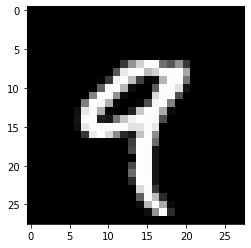

In [8]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [9]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

## 2.Data Preprocessing
### 1)Reshape and Normalization
* reshape
  * (60000, 28, 28) to (60000, 784)

In [10]:
#한줄로 쭉 펴준다
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [11]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

### 2)One Hot Encoding

In [12]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 3.MNIST Keras Modeling
### 1)Model Define
* 모델 신경망 구조 정의
  * 2개의 Hidden Layers & 768개의 Nodes
  * 복잡한 Model Capacity로 인한 Overfitting
  * Dropout layer : ()안의 비율만큼 drop한다

In [13]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [14]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 2)Model Compile
* 모델 학습방법 설정

In [15]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Model Fit
* 약 3분

In [16]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.5405 - accuracy: 0.8296 - val_loss: 0.1508 - val_accuracy: 0.9568
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1536 - accuracy: 0.9521 - val_loss: 0.1023 - val_accuracy: 0.9691
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9669 - val_loss: 0.0885 - val_accuracy: 0.9755
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9731 - val_loss: 0.0967 - val_accuracy: 0.9735
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.0902 - val_accuracy: 0.9758
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0949 - val_accuracy: 0.9773
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.0914 - val_accuracy: 0.9785

### 4)학습 결과 시각화 - Overfitting
* Loss Visualization

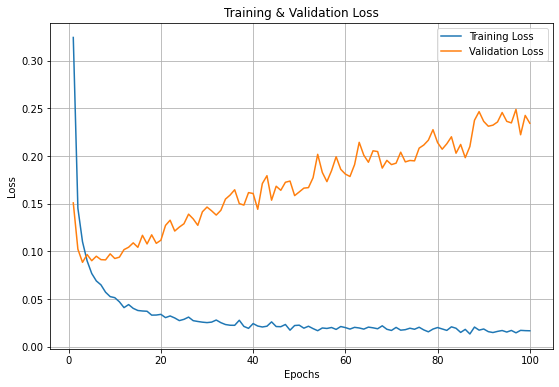

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
#plt.ylim(0,0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

#기존에 비해 overfitting이 덜 일어났다

## 5)Model Evaluate
* Loss & Accuracy

In [18]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

#기존에 비해 Accuracy는 약간 떨어졌다(성능감소)

313/313 [==============================] - 1s 2ms/step - loss: 0.2057 - accuracy: 0.9830
Loss = 0.20569
Accuracy = 0.98300


### 6)Model Predict
* Probability

In [19]:
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [20]:
print(mnist.predict_classes(X_test[:1, :]))

[7]


본 내용은 2021/03/19(금)에 학습한 내용입니다.